# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

In [24]:
#Type your code here
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jillanisofttech/market-segmentation-in-insurance-unsupervised")

print("Path ke file dataset:", path)

Path ke file dataset: /root/.cache/kagglehub/datasets/jillanisofttech/market-segmentation-in-insurance-unsupervised/versions/1


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [25]:
#Type your code here
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [26]:
def plot_explained_variance(pca):
    # Fungsi ini menggambarkan rasio varians yang dijelaskan secara kumulatif untuk objek PCA yang telah di-fit.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('Komponen N', fontsize=48)
    ax.set_ylabel('Variansi yang Dijelaskan Secara Akumulatif', fontsize=48)
    plt.tight_layout()
    plt.show()

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [27]:
df = pd.read_csv("Customer Data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. **Memahami Struktur Data**




**Saya akan mengecek jumlah baris dan kolom dalam dataset**

In [28]:
rows, columns = df.shape
print(f"Dataset memiliki {rows} baris dan {columns} kolom.")

Dataset memiliki 8950 baris dan 18 kolom.


**Saya akan meninjau jenis data di setiap kolom.**

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Saya akan menggunakan fungsi dtypes untuk memastikan jenis data numerik atau kategorikal**

In [30]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


### 2. **Mengecek Data yang hilang**

**Saya akan mengecek apakah ada data yang hilang**

In [31]:
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [32]:
df_baru=df.drop('CUST_ID', axis=1)

<Axes: >

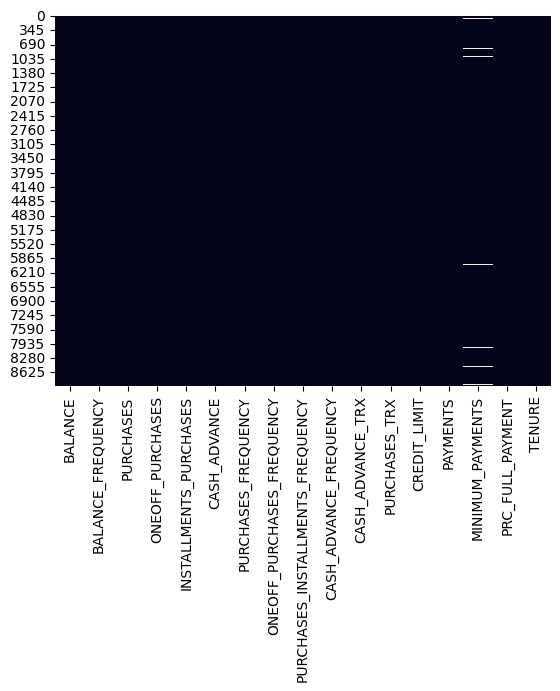

In [33]:
sns.heatmap(df_baru.isnull(), cbar=False)

In [34]:
df_baru["MINIMUM_PAYMENTS"] = df_baru["MINIMUM_PAYMENTS"].fillna(df_baru["MINIMUM_PAYMENTS"].median())
df_baru["CREDIT_LIMIT"] = df_baru["CREDIT_LIMIT"].fillna(df_baru["CREDIT_LIMIT"].median())
df_baru.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


### 3. ***Analisis Distribusi dan Korelasi***

In [35]:
df_baru.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.282473,1733.143852,844.906767,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.646702,2895.063757,2332.792322,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,788.713501,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


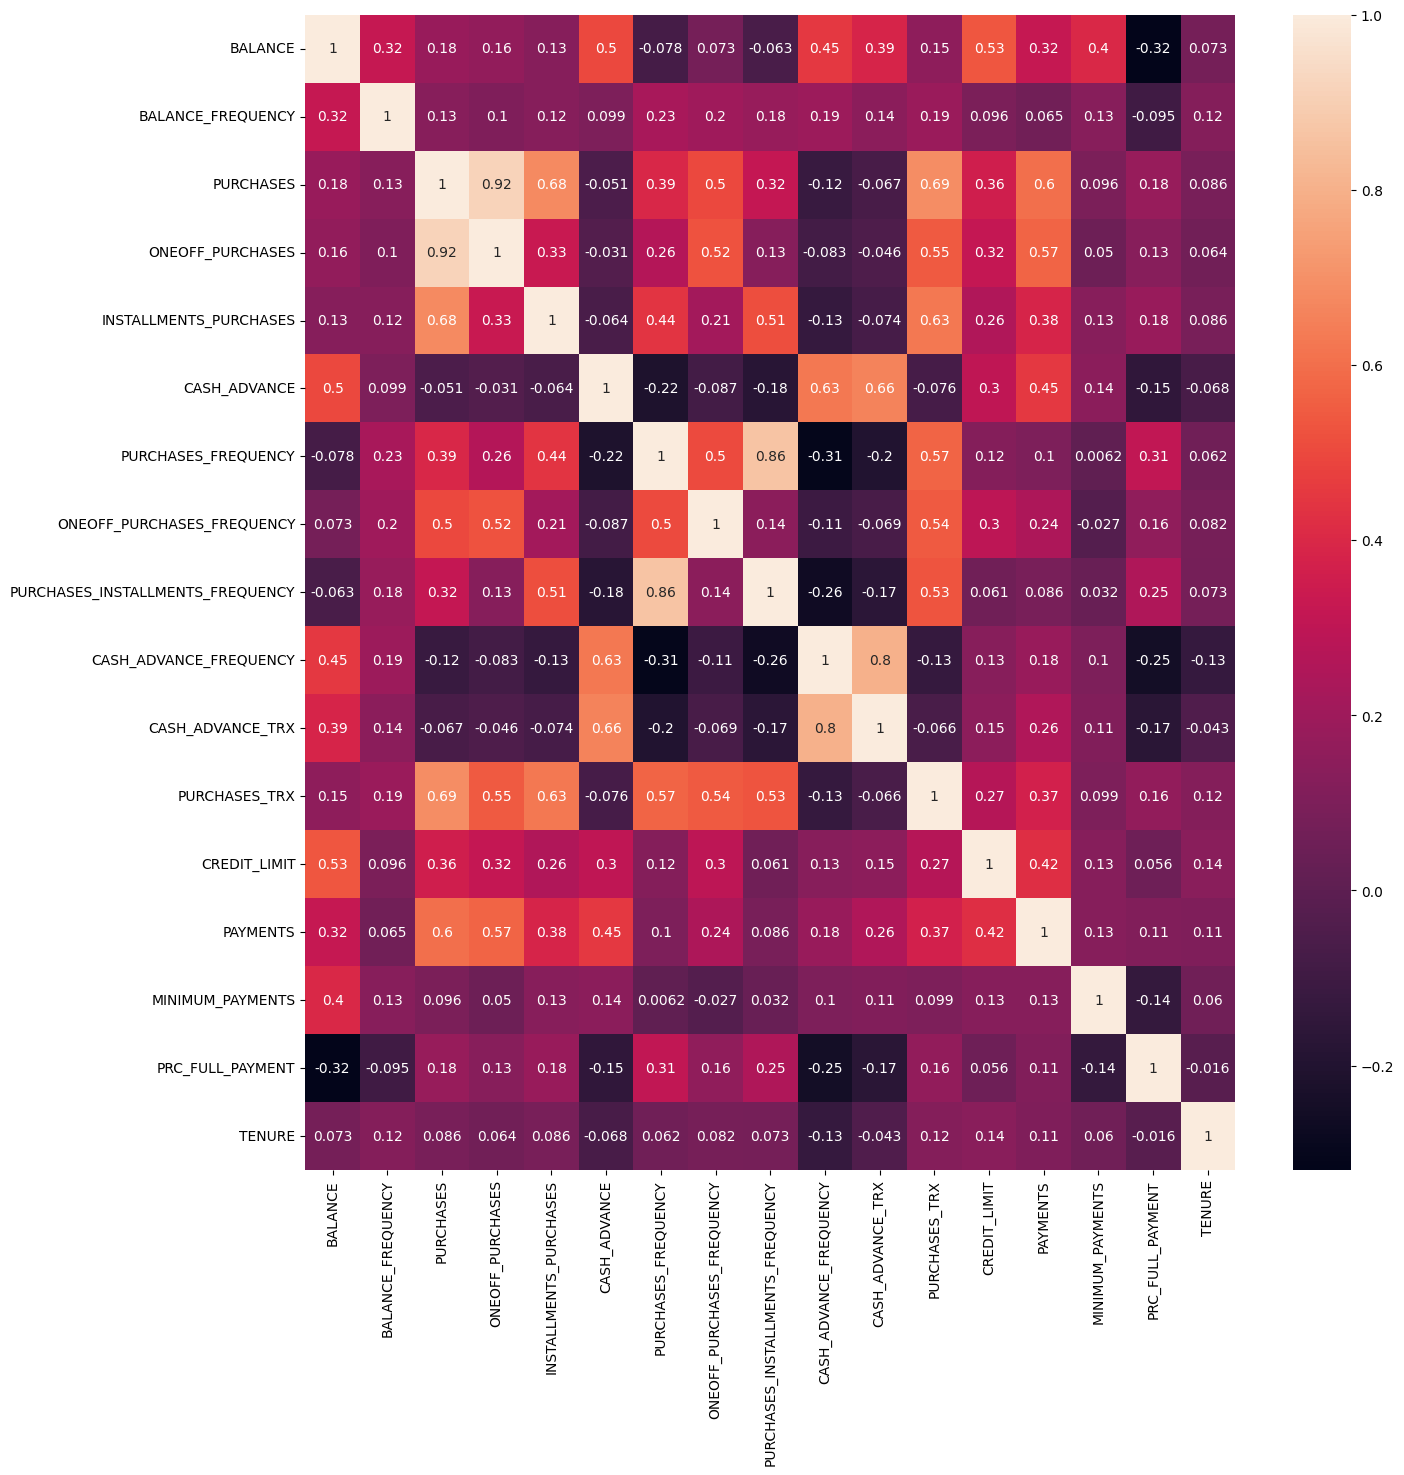

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df_baru.corr(), annot=True)
plt.show()

## **4. Visualisasi Data**

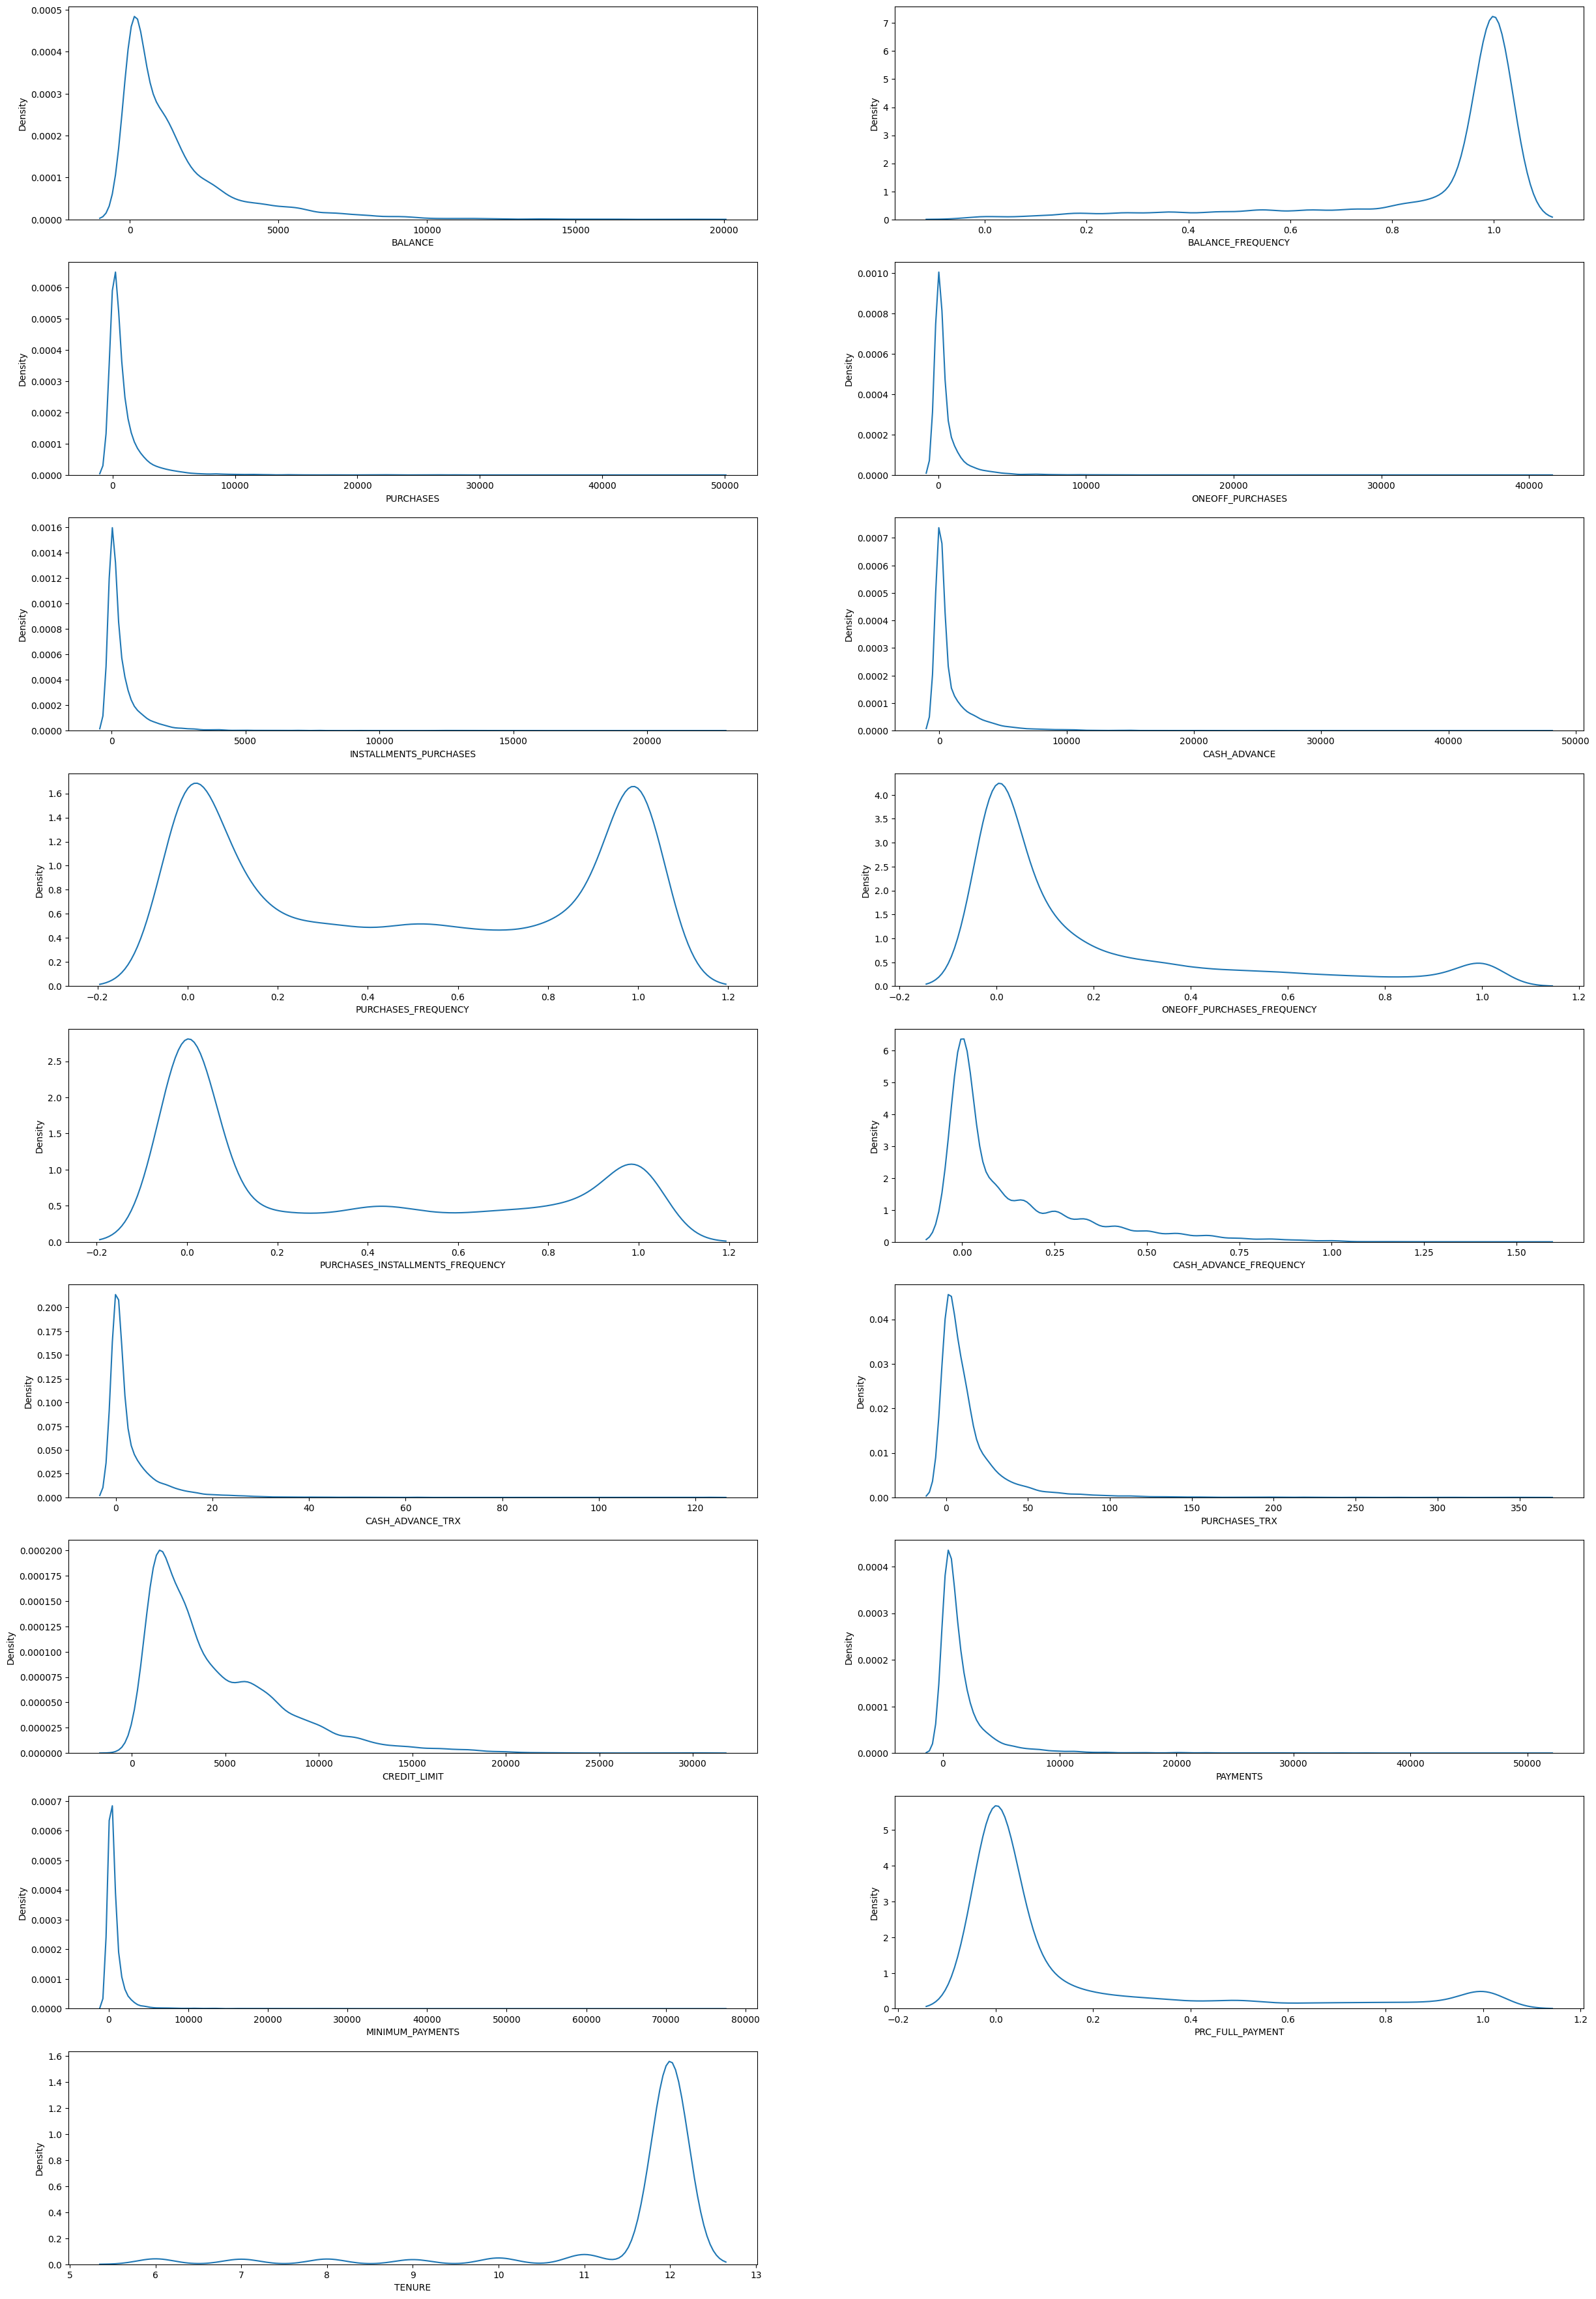

In [37]:
plt.figure(figsize=(30, 45))
for i, column in enumerate(df_baru.columns):
    if df_baru[column].dtype != 'object':
        ax = plt.subplot(9, 2, i + 1)
        sns.kdeplot(df_baru[column], ax=ax)
        plt.xlabel(column)

plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [38]:
print(df_baru.isnull().sum())

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [39]:
print(f"Jumlah duplikasi: {df_baru.duplicated().sum()}")

Jumlah duplikasi: 0


In [40]:
# Normalisasi fitur numerik
scaler = StandardScaler()
scaler.fit(df_baru)
scaled_df = pd.DataFrame(scaler.fit_transform(df_baru), columns=df_baru.columns)
print("Fitur telah dinormalisasi")

Fitur telah dinormalisasi


In [41]:
print("Dataframe yang akan digunakan untuk pemodelan:")
scaled_df

Dataframe yang akan digunakan untuk pemodelan:


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.486217,-0.341250,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960378,-0.503396,-0.228307,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960378,-0.570615,-0.326875,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097800,-0.580536,-0.338305,0.329200,-4.122768


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [42]:
# --- Pembangunan Model Clustering Setelah PCA ---
print("\nPembangunan Model Clustering Setelah PCA")

# Melakukan PCA untuk reduksi dimensi
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components, columns=["PCA1", "PCA2"])
print(pca_df.head())


Pembangunan Model Clustering Setelah PCA
       PCA1      PCA2
0 -1.683649 -1.072241
1 -1.134085  2.509150
2  0.969395 -0.383577
3 -0.888220  0.004648
4 -1.600021 -0.683795


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.


Evaluasi Model Clustering Setelah PCA


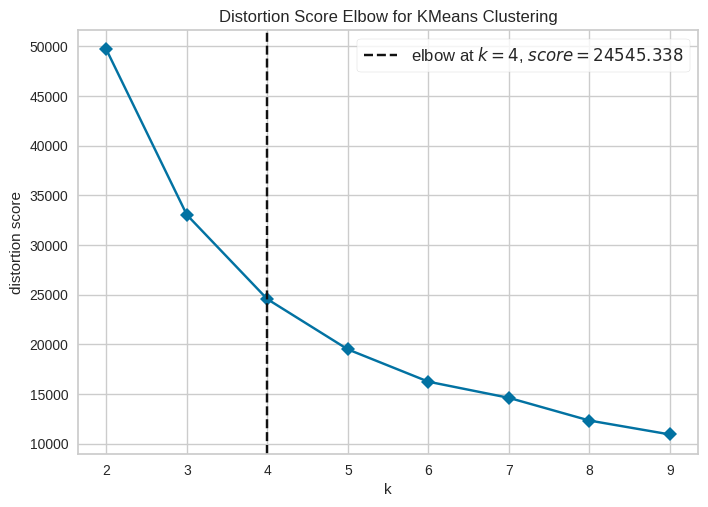

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer
# --- Evaluasi Model Clustering Setelah PCA ---
print("\nEvaluasi Model Clustering Setelah PCA")

# Elbow Method untuk menentukan jumlah cluster optimal
model = KMeans(random_state=42)
elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
elbow_visualizer.fit(pca_df)
elbow_visualizer.show()

In [44]:
from sklearn.metrics import silhouette_score
# Hitung Silhouette Score untuk setiap jumlah cluster
silhouette_scores = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, random_state=42)
    labels = kmeans.fit_predict(pca_df)
    score = silhouette_score(pca_df, labels)
    silhouette_scores[n_clusters] = score
    print(f"Silhouette Score untuk {n_clusters} cluster: {score}")

Silhouette Score untuk 2 cluster: 0.4623771448920161
Silhouette Score untuk 3 cluster: 0.4487708676475587
Silhouette Score untuk 4 cluster: 0.40740291225352293
Silhouette Score untuk 5 cluster: 0.3982149960433367
Silhouette Score untuk 6 cluster: 0.385702255727409
Silhouette Score untuk 7 cluster: 0.38715429626643694
Silhouette Score untuk 8 cluster: 0.3933416028250047
Silhouette Score untuk 9 cluster: 0.3731811989568609
Silhouette Score untuk 10 cluster: 0.36342653092900845


In [45]:
# Menentukan jumlah cluster optimal berdasarkan Silhouette Score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"Jumlah cluster optimal berdasarkan Silhouette Score: {optimal_clusters}")

Jumlah cluster optimal berdasarkan Silhouette Score: 2


In [46]:
# Melatih model clustering dengan jumlah cluster optimal
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(pca_df)
kmeans_labels = kmeans.labels_

In [47]:
# Tambahkan hasil clustering ke dataset PCA
df_clustered = pca_df.copy()
df_clustered["Cluster"] = kmeans_labels

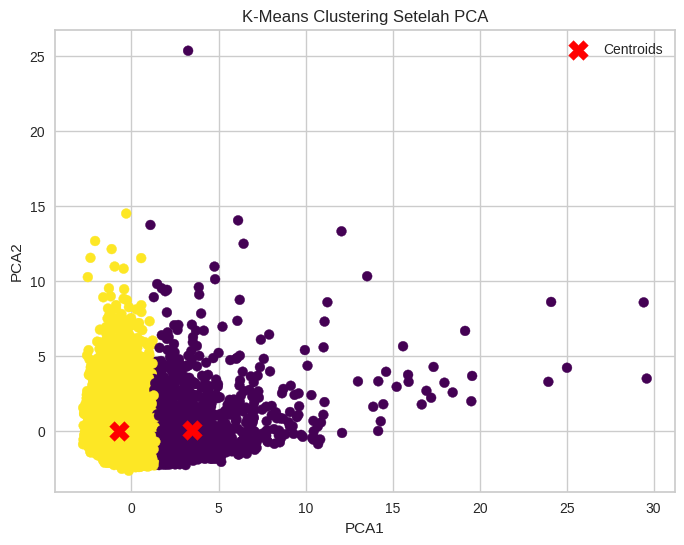

In [48]:
# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df_clustered["PCA1"], df_clustered["PCA2"], c=df_clustered["Cluster"], cmap="viridis", s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering Setelah PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend()
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [49]:
# --- Feature Selection Setelah Clustering ---
print("\nMelakukan Feature Selection")
# Daftar fitur yang telah ditetapkan
selected_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']

# Memilih subset dari dataframe berdasarkan fitur yang telah ditentukan
scaled_df_selected = scaled_df[selected_columns]

print(f"Fitur terpilih: {list(selected_columns)}")


Melakukan Feature Selection
Fitur terpilih: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES']



Evaluasi Model Clustering Setelah Feature Selection


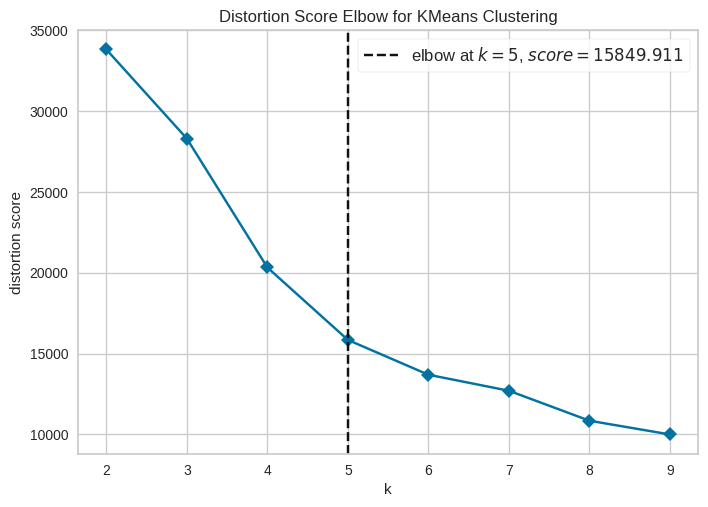

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
# --- Evaluasi Model Clustering Setelah Feature Selection ---
print("\nEvaluasi Model Clustering Setelah Feature Selection")

# Elbow Method untuk menentukan jumlah cluster optimal
elbow_visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
elbow_visualizer.fit(scaled_df_selected)
elbow_visualizer.show()

In [51]:
# Hitung Silhouette Score untuk setiap jumlah cluster setelah feature selection
silhouette_scores_after = {}
best_score = 0
best_k = 0
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, random_state=42)
    labels = kmeans.fit_predict(scaled_df_selected)
    score = silhouette_score(scaled_df_selected, labels)
    silhouette_scores_after[n_clusters] = score
    print(f"Silhouette Score untuk {n_clusters} cluster: {score}")

    if score > best_score:
        best_score = score
        best_k = n_clusters

print(f"\nCluster terbaik: {best_k}, Silhouette Score terbaik: {best_score:.2f}")

Silhouette Score untuk 2 cluster: 0.6752737663189481
Silhouette Score untuk 3 cluster: 0.4432074721074257
Silhouette Score untuk 4 cluster: 0.4712418400006045
Silhouette Score untuk 5 cluster: 0.47500254486798926
Silhouette Score untuk 6 cluster: 0.4660629866454409
Silhouette Score untuk 7 cluster: 0.3748424048961218
Silhouette Score untuk 8 cluster: 0.3792370826336091
Silhouette Score untuk 9 cluster: 0.38167780928274164
Silhouette Score untuk 10 cluster: 0.3936282901971064

Cluster terbaik: 2, Silhouette Score terbaik: 0.68


In [52]:
# Menentukan jumlah cluster optimal berdasarkan Silhouette Score setelah feature selection
optimal_clusters_after = max(silhouette_scores_after, key=silhouette_scores_after.get)
print(f"Jumlah cluster optimal setelah Feature Selection: {optimal_clusters_after}")

Jumlah cluster optimal setelah Feature Selection: 2


In [53]:
# Melatih model clustering dengan jumlah cluster optimal setelah feature selection
kmeans = KMeans(n_clusters=optimal_clusters_after, random_state=42)
kmeans.fit(scaled_df_selected)
labels = kmeans.labels_

In [54]:
# Tambahkan hasil clustering ke dataset setelah feature selection
scaled_df_selected["Cluster"] = labels

<ipython-input-54-c3e7e738685f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaled_df_selected["Cluster"] = labels


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

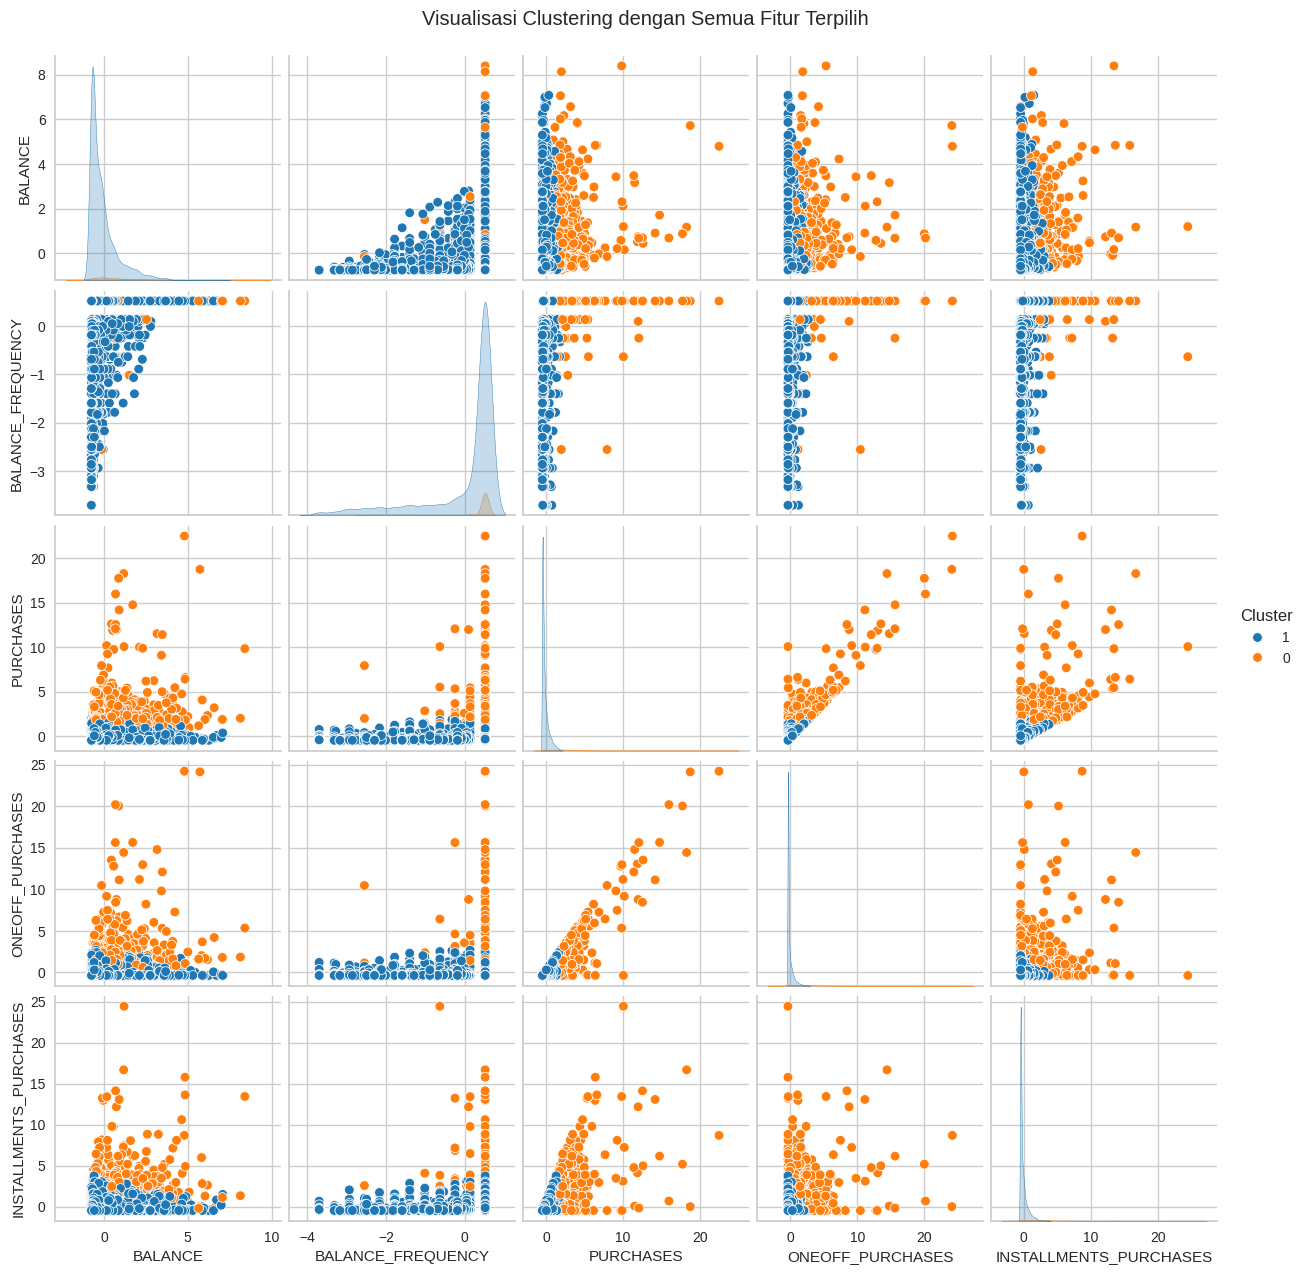

In [55]:
# Visualisasi hasil clustering setelah feature selection (semua fitur)
pairplot_data = scaled_df_selected.copy()
pairplot_data["Cluster"] = pairplot_data["Cluster"].astype(str)  # Konversi cluster ke string untuk hue
sns.pairplot(pairplot_data, hue="Cluster", palette="tab10")
plt.suptitle("Visualisasi Clustering dengan Semua Fitur Terpilih", y=1.02)
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [56]:
# --- Analisis dan Interpretasi Hasil Cluster ---
print("\nAnalisis dan Interpretasi Hasil Cluster")
cluster_analysis = scaled_df_selected.groupby("Cluster").mean()
print("Rata-rata nilai fitur per cluster:")
print(cluster_analysis)


Analisis dan Interpretasi Hasil Cluster
Rata-rata nilai fitur per cluster:
          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0        1.045866           0.444566   3.334617          2.855594   
1       -0.046374          -0.019712  -0.147859         -0.126619   

         INSTALLMENTS_PURCHASES  
Cluster                          
0                      2.638584  
1                     -0.116997  


<ipython-input-57-e70c9e424828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')


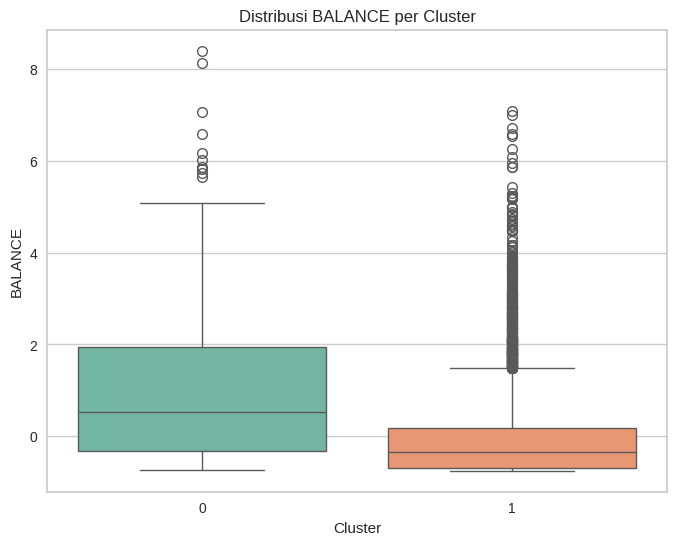

<ipython-input-57-e70c9e424828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')


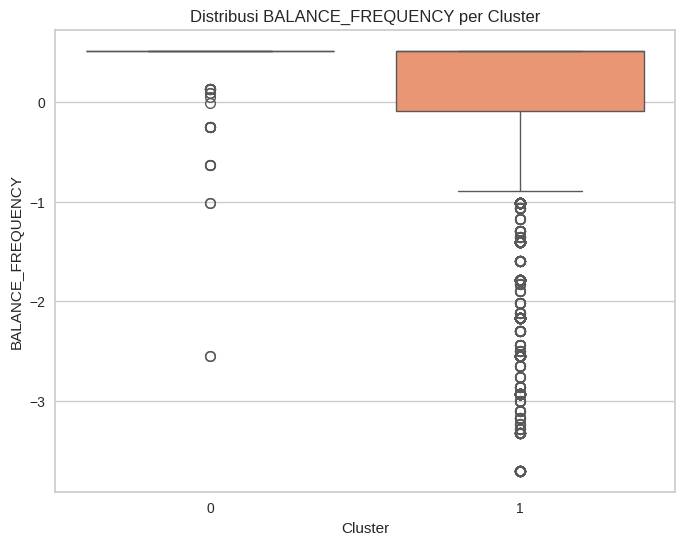

<ipython-input-57-e70c9e424828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')


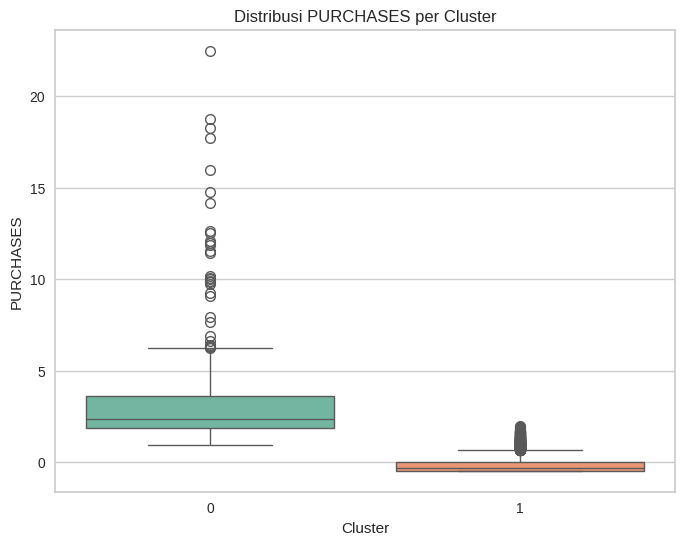

<ipython-input-57-e70c9e424828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')


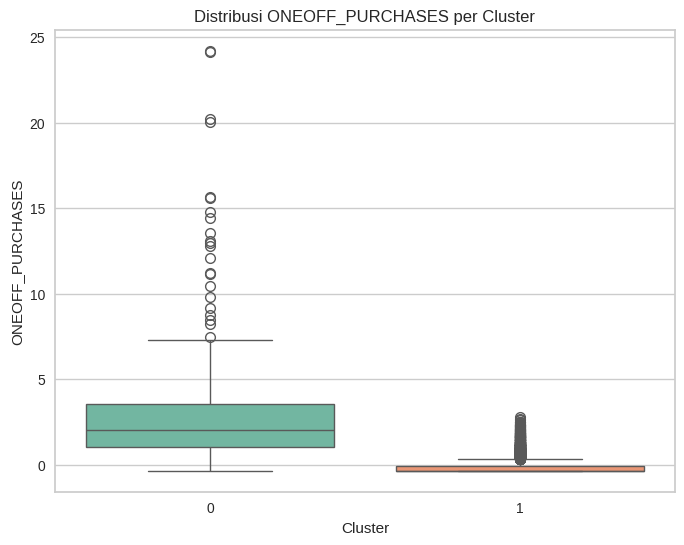

<ipython-input-57-e70c9e424828>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')


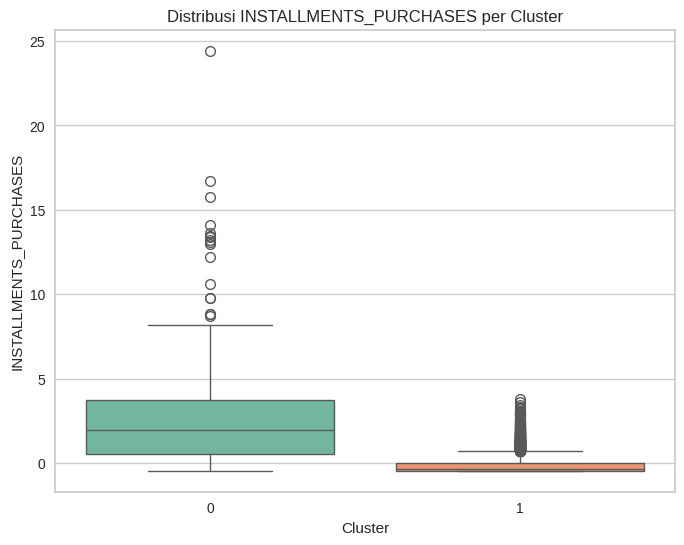

In [57]:
# Visualisasi distribusi nilai tiap cluster
for col in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x="Cluster", y=col, data=scaled_df_selected, palette='Set2')
    plt.title(f"Distribusi {col} per Cluster")
    plt.show()

<ipython-input-58-de77e766ab1e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=scaled_df_selected, palette='Set2')


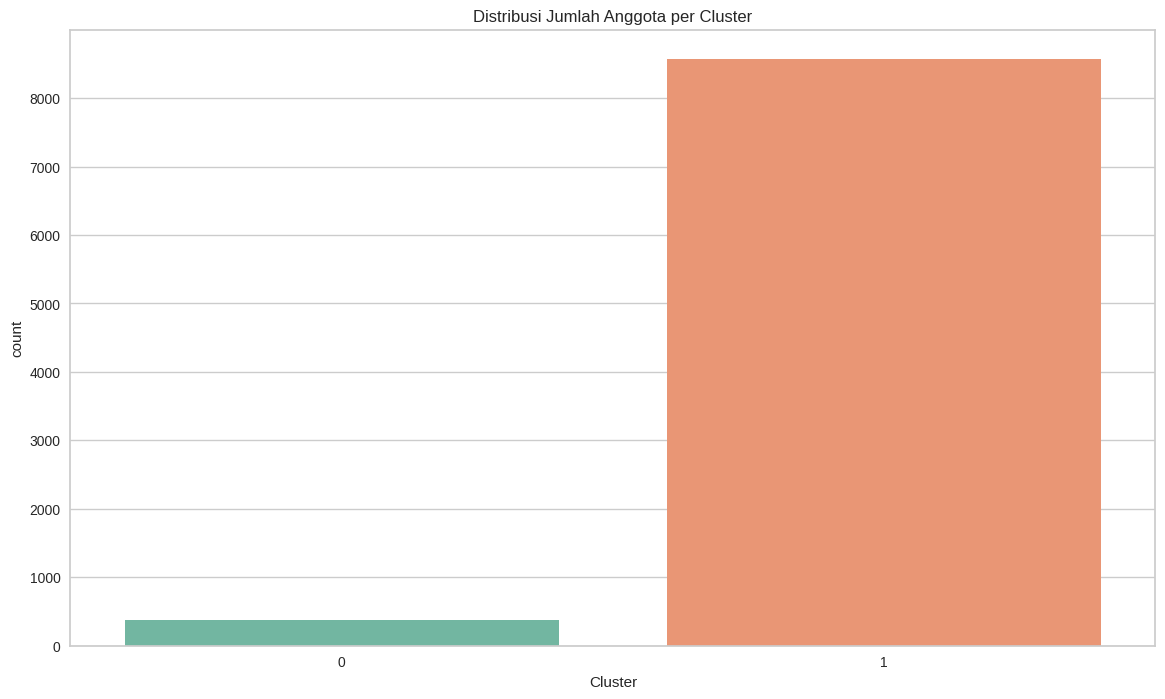

In [58]:
# Visualisasi jumlah anggota cluster
plt.figure(figsize=(14, 8))
sns.countplot(x='Cluster', data=scaled_df_selected, palette='Set2')
plt.title("Distribusi Jumlah Anggota per Cluster")
plt.show()

In [59]:
# Analisis cluster individual
for cluster_id in range(optimal_clusters_after):
    cluster_data = scaled_df_selected[scaled_df_selected["Cluster"] == cluster_id]
    print(f"Data untuk Cluster {cluster_id}:")
    print(cluster_data.head())

Data untuk Cluster 0:
     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6  -0.450277           0.518084   2.849408          3.500548   
21  2.308552           0.518084   2.507235          3.203770   
30  5.079113           0.518084   0.952394          0.253503   
57  0.394854           0.518084   1.972565          2.528416   
71  0.685085           0.134325   1.647573          0.645654   

    INSTALLMENTS_PURCHASES  Cluster  
6                 0.306664        0  
21                0.042954        0  
30                1.784546        0  
57                0.019311        0  
71                2.707228        0  
Data untuk Cluster 1:
    BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.731989          -0.249434  -0.424900         -0.356934   
1  0.786961           0.134325  -0.469552         -0.356934   
2  0.447135           0.518084  -0.107668          0.108889   
3  0.049099          -1.016953   0.232058          0.546189   
4 -0.358775           0.5180

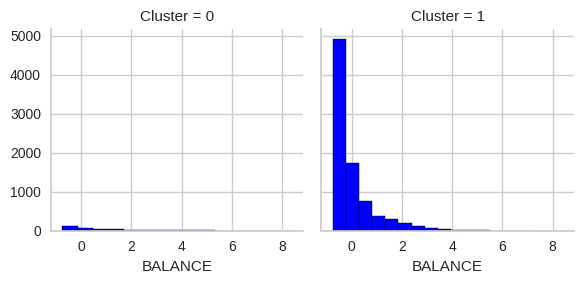

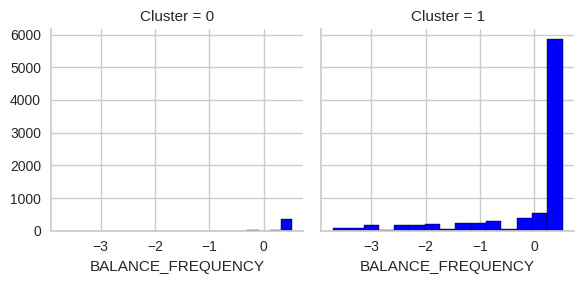

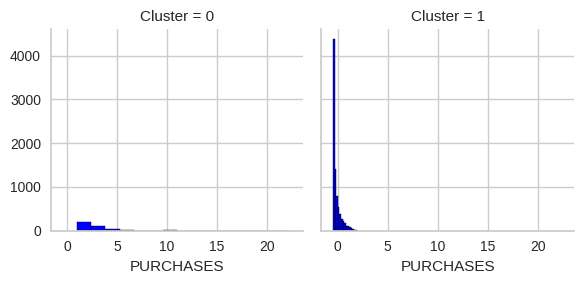

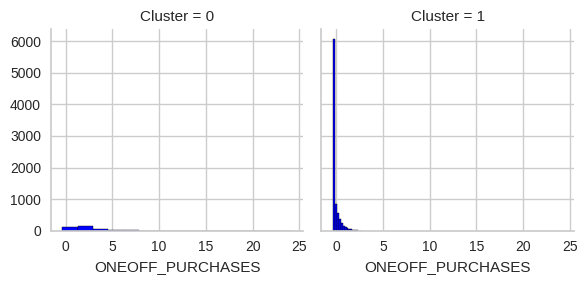

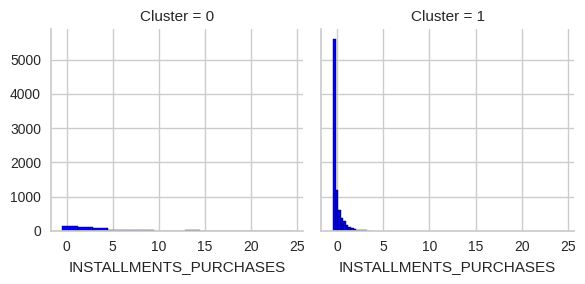

In [60]:
# Visualisasi distribusi setiap fitur di masing-masing cluster
for c in scaled_df_selected.drop(['Cluster'], axis=1):
    grid = sns.FacetGrid(scaled_df_selected, col='Cluster')
    grid.map(plt.hist, c, bins=15, color='blue', edgecolor='black')
plt.show()

Tulis hasil interpretasinya di sini.
- Cluster 1: Cluster 0 merepresentasikan pelanggan yang lebih aktif dalam hal aktivitas keuangan, khususnya pembelian secara one-off dan melalui cicilan.

- Cluster 2: Cluster 1 merepresentasikan pelanggan dengan aktivitas keuangan yang lebih rendah, dengan frekuensi pembelian yang jarang dan jumlah pembelian yang kecil.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [61]:
# --- Menyimpan Hasil Clustering ---
cluster_df = pd.concat([df_baru.reset_index(drop=True), scaled_df_selected["Cluster"]], axis=1)

In [62]:
# Simpan hasil clustering ke dalam file CSV
cluster_df.to_csv("hasil_clustering.csv", index=False)
print("Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'")

Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'
